In [1]:
import tensorflow as tf # tensorflow 2.0
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
import imageio
import pandas as pd
import keras
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
labels = pd.read_csv("../../Xray_TeethLabels_Simple.csv",index_col=0)
Ylabels = labels[5:]
metaY = labels[:3]
X = []
Y = []
Z = []

for picFilename in glob.glob("../../processed3/processed/*"):
    #patNumber = picFilename.split('\\')[2].split('_')[0]
    #toothNumber = picFilename.split('/')[4].split('_')[1].split('.')[0]
    #print(picFilename)
    patNumber = picFilename.split('/')[4].split('_')[0]
    toothNumber1 = picFilename.split('/')[4].split('_')[1]
    toothNumber2 = picFilename.split('/')[4].split('_')[2].split('.')[0]
    im = Image.open(picFilename)
    X.append(np.array(im))
    if Ylabels.loc[toothNumber1,patNumber] == 'Yes' or Ylabels.loc[toothNumber2,patNumber] == 'Yes':
        Y.append(1)
    else:
        Y.append(0)
    Z.append(picFilename)

X = np.array(X)

X_train, X_test, Y_train_original, Y_test_original,Z_train,Z_test = train_test_split(X, np.array(Y),Z, random_state = 100, test_size=0.20)

Y_train = tf.keras.utils.to_categorical(Y_train_original, 2)
Y_test = tf.keras.utils.to_categorical(Y_test_original, 2)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(256, 5, activation='relu', input_shape=(500, 500, 3)))
#model.add(Dropout(0.05))
model.add(MaxPooling2D())

model.add(Conv2D(128, 5, activation='relu'))

model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
max_epochs = 3
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=max_epochs)
info = model.evaluate(X_test, Y_test)
print('Accuracy score for epoches ' + str(max_epochs) + ':', info[1])

predictions = (model.predict(X_test) > 0.5).astype(int)
print(predictions)
pred = []

for prediction in predictions:
    i, = np.where(prediction == 1)
    pred.append(i[0])

print(pred)
print(Y_test_original)
print(classification_report(Y_test_original, pred))
tn, fp, fn, tp = confusion_matrix(Y_test_original, pred).ravel()
print(tn, fp, fn, tp)


Epoch 1/3
5/5 [==============================] - 221s 40s/step - loss: 48865.9062 - accuracy: 0.4519 - val_loss: 1240.7819 - val_accuracy: 0.4412
Epoch 2/3
5/5 [==============================] - 185s 35s/step - loss: 393.3966 - accuracy: 0.5556 - val_loss: 22.3341 - val_accuracy: 0.5588
Epoch 3/3
2/2 [==============================] - 11s 888ms/step - loss: 79.6719 - accuracy: 0.4412
Accuracy score for epoches 3: 0.44117647409439087
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1]
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        15
           1       0.00      0.00      0.0

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
image = X_test[5]
print(image.shape)
np.column_stack((Z_test,Y_test))

(500, 500, 3)


array([['../../processed3/processed/Patient 17_19_18.png', '1.0', '0.0'],
       ['../../processed3/processed/Patient 16_13_14.png', '0.0', '1.0'],
       ['../../processed3/processed/Patient 16_14_15.png', '1.0', '0.0'],
       ['../../processed3/processed/Patient 22_19_18.png', '1.0', '0.0'],
       ['../../processed3/processed/Patient 7_30_29.png', '1.0', '0.0'],
       ['../../processed3/processed/Patient 15_20_19.png', '0.0', '1.0'],
       ['../../processed3/processed/Patient 5_29_28.png', '1.0', '0.0'],
       ['../../processed3/processed/Patient 7_4_5.png', '0.0', '1.0'],
       ['../../processed3/processed/Patient 15_14_15.png', '0.0', '1.0'],
       ['../../processed3/processed/Patient 20_31_30.png', '0.0', '1.0'],
       ['../../processed3/processed/Patient 2_13_14.png', '0.0', '1.0'],
       ['../../processed3/processed/Patient 18_21_20.png', '1.0', '0.0'],
       ['../../processed3/processed/Patient 12_13_14.png', '1.0', '0.0'],
       ['../../processed3/processed/Patient 

In [8]:
%load_ext autoreload
%autoreload 2
import os,sys
import lime
from lime import lime_image

In [9]:
explainer = lime_image.LimeImageExplainer()

In [10]:
explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=2, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
from skimage.segmentation import mark_boundaries

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


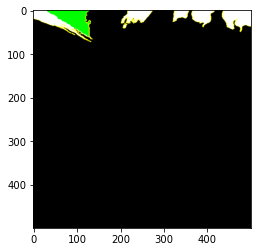

In [12]:
from matplotlib import pyplot as plt
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

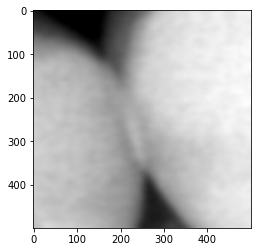

In [13]:
plt.imshow(image)